# Table Of Contents

### 1 Import Libraries

### 2 Data Cleaning

### 3 Visualizations and Relationships

### Hypothesis

# 1 Importing Libraries and Visulization Tools


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [26]:
# Define Path
path = r'C:\Users\Javier\Documents\CF Gun Violence'

In [27]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Original Data', 'gun_violence_clean.csv'), index_col = False)

# Correlations and Visualizations

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1059 non-null   int64  
 1   incident_id                  1059 non-null   int64  
 2   date                         1059 non-null   object 
 3   state                        1059 non-null   object 
 4   city_or_county               1059 non-null   object 
 5   address                      1059 non-null   object 
 6   n_killed                     1059 non-null   int64  
 7   n_injured                    1059 non-null   int64  
 8   incident_url                 1059 non-null   object 
 9   source_url                   1059 non-null   object 
 10  incident_url_fields_missing  1059 non-null   bool   
 11  congressional_district       1059 non-null   float64
 12  gun_stolen                   1059 non-null   object 
 13  gun_type          

In [35]:
# Create a subset excluding 'unnamed:0'
sub = df[['incident_id','n_killed','n_injured','congressional_district','latitude','longitude','n_guns_involved', 'state_house_district','state_senate_district']]

In [36]:
sub.corr()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
incident_id,1.000000,-0.047765,-0.050083,0.004937,0.050783,-0.025962,0.020726,-0.016763,-0.074320
n_killed,-0.047765,1.000000,-0.228960,0.073694,-0.025484,-0.068049,-0.025476,-0.031551,0.007239
n_injured,-0.050083,-0.228960,1.000000,-0.023216,-0.037965,0.035959,-0.012901,-0.069288,-0.065040
congressional_district,0.004937,0.073694,-0.023216,1.000000,-0.241790,-0.125583,-0.017586,0.176791,0.333415
latitude,0.050783,-0.025484,-0.037965,-0.241790,1.000000,-0.000757,0.048726,-0.106853,0.034238
longitude,-0.025962,-0.068049,0.035959,-0.125583,-0.000757,1.000000,-0.105304,0.241387,0.118177
n_guns_involved,0.020726,-0.025476,-0.012901,-0.017586,0.048726,-0.105304,1.000000,-0.049016,-0.060359
state_house_district,-0.016763,-0.031551,-0.069288,0.176791,-0.106853,0.241387,-0.049016,1.000000,0.338258
state_senate_district,-0.074320,0.007239,-0.065040,0.333415,0.034238,0.118177,-0.060359,0.338258,1.000000


In [37]:
sub.shape

(1059, 9)

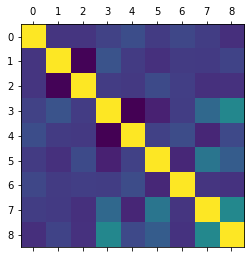

In [38]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

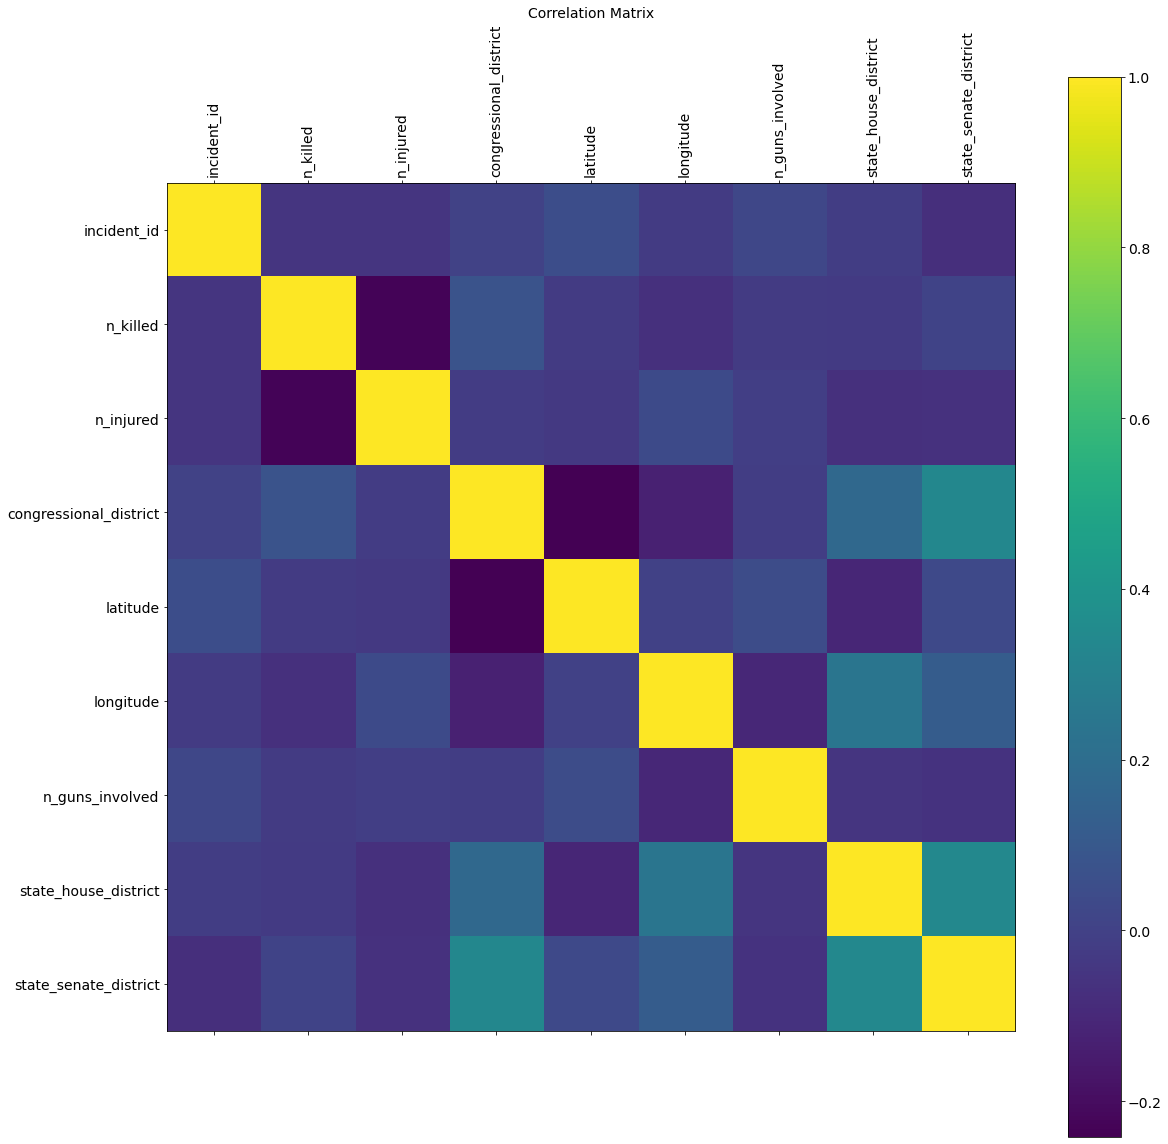

In [39]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(19, 19)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation = 90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

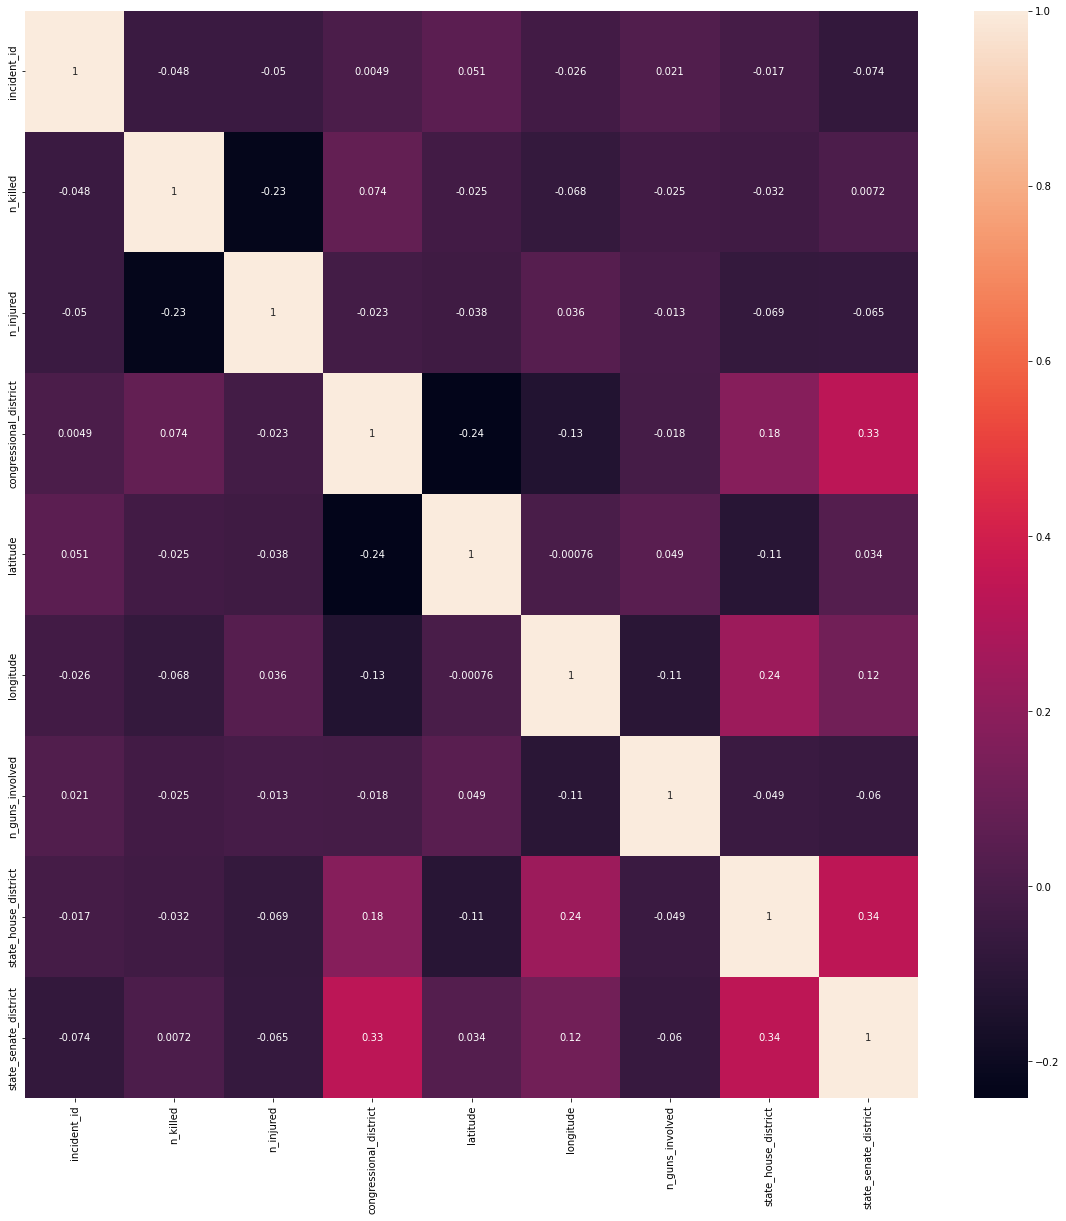

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,20))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The strongest positive corrleation exists between the state house district and the statehouse senate for gun violence. Another positive correlation for gun viiolence is the incident_id and the latitude so we can find those locations because that is where the gun violence is happening. Another strong correlation 

The negative correlations are the amoung injured and the incident_id the incident has a negative correlation with how many people get injured. Another weak correlation is longitude and number of guns involved that has a negative correlation.

# Scatterplots

In [41]:
# Creating a random sample of sub dataframe to use for scatterplot
np.random.seed(4)
dev = np.random.rand(len(sub)) <= .9995
big = sub[dev]
small = sub[~dev]

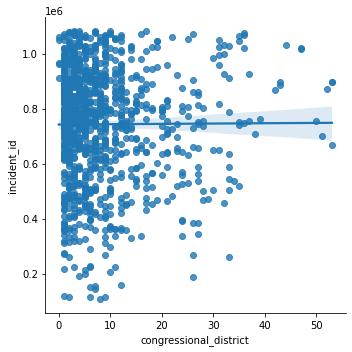

In [45]:
# Create a scatterplot for the "rank" and "previous" columns in seaborn

sns.lmplot(x = 'congressional_district', y = 'incident_id', data = df)

This scatterplot shows a weak postive relationship between congressional district and incident_id. As incidents increase it also increases in the congressional district more so that means there is more gun violence in those certain districts but there are also a ton of outliers.

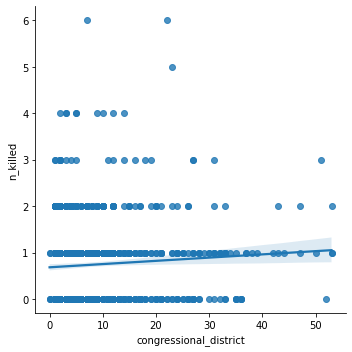

In [46]:
# Create a scatterplot for the "congressional_district" and "n_killed" columns in seaborn

sns.lmplot(x = 'congressional_district', y = 'n_killed', data = df)

This scatterplot shows a weak positive correlation between congressional_district and the n_killed meaning that whatever congressional district you reside in you are more likely to fall to gin violence or see someone get killed due to gun violence. There are many outliers for n_killed like in district 20 has 6 people killed but also has data of nobody being killed. 

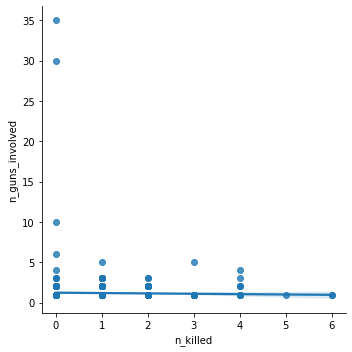

In [47]:
# Create a scatterplot for the "n_killed" and "n_guns_involved" columns in seaborn

sns.lmplot(x = 'n_killed', y = 'n_guns_involved', data = df)

This scatterplot shows a very very weak negative correlation between number of people killed and number of guns involved. We have outliers as well that show that there was nobody killed but 35 guns involved so we can indicate that this was some kind of drug bust. We also see that the more people that are killed have a tiny negative correlation of guns involved.

# Pair Plot

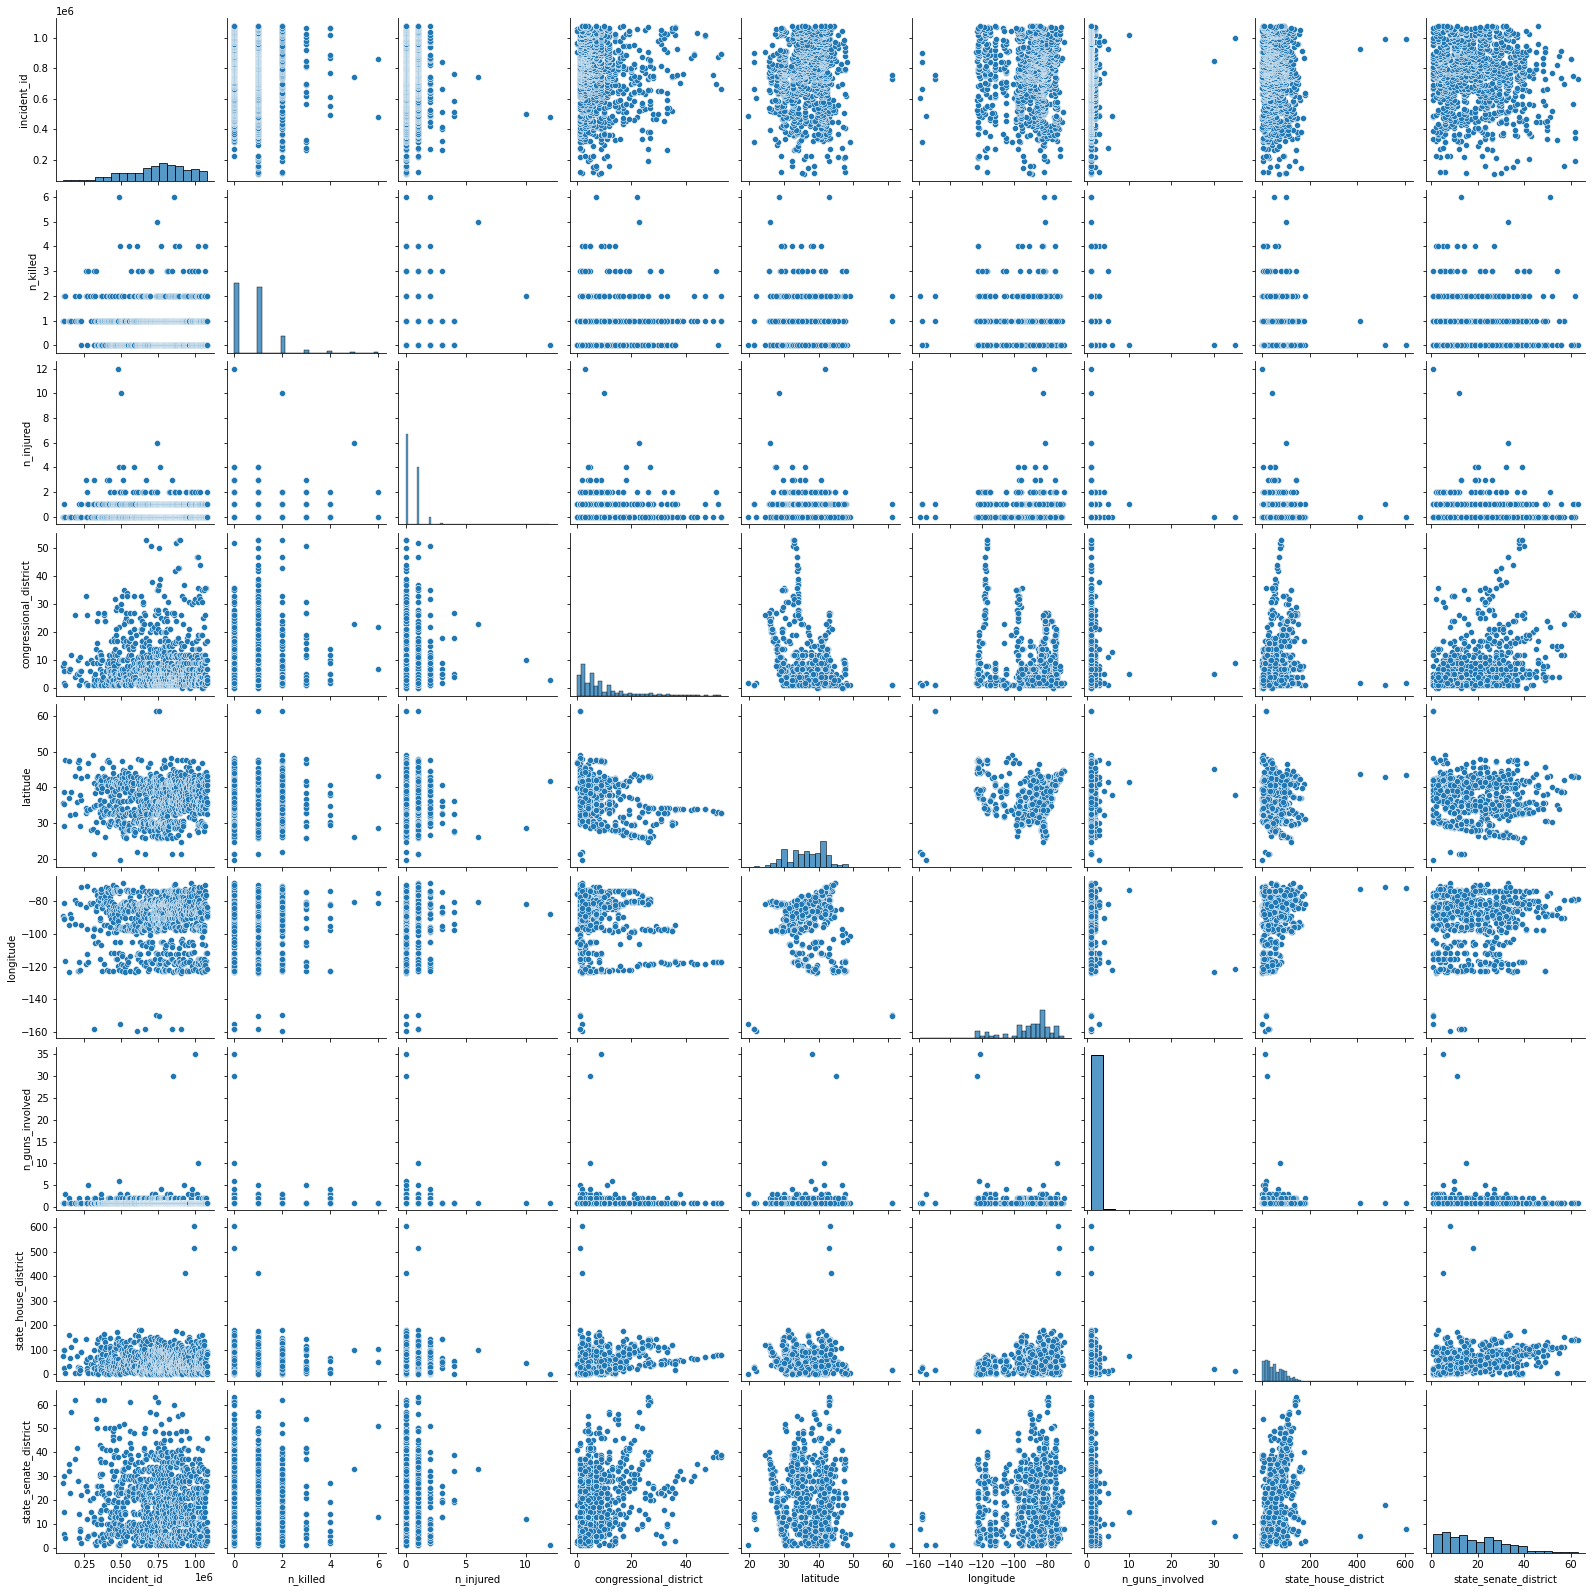

In [49]:
# Create a pair plot 

pair_plot = sns.pairplot(sub)

There seems to be a lot of data in here that is no correlation to gun violence with my subset. I see very weak positive correlations and very weak negative correlations with my data set like with the state house district and the number of guns involved. 

# Catergorical Plot

<AxesSubplot:xlabel='n_killed', ylabel='Count'>

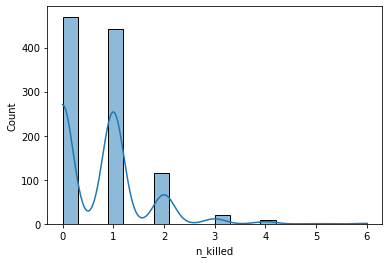

In [53]:
# Create a histogram n_killed variable 
sns.histplot(df['n_killed'], bins = 20, kde = True)

In [56]:
# Create a categorical variable of n_killed with categories for low rate, medium rate, and high rate
df.loc[df['n_killed'] < 2, 'n_killed category'] = 'low rate'

In [60]:
df.loc[(df['n_killed'] >= 2) & (small['n_killed'] < 4), 'n_killed category'] = 'mid rate'

In [61]:
df.loc[df['n_killed'] > 4, 'n_killed category'] = 'high rate'

In [62]:
# Checking the distribution of the duration category variable 
df['n_killed category'].value_counts(dropna = False)

low rate     912
NaN          144
high rate      3
Name: n_killed category, dtype: int64

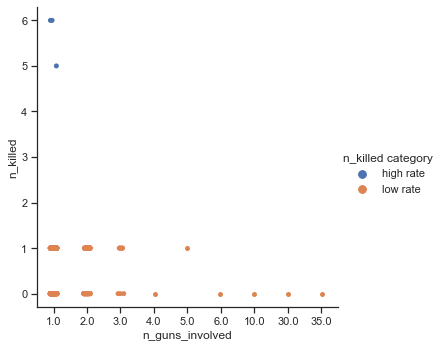

In [68]:
# Create a categorical plot in seaborn using the n_killed categories

sns.set(style="ticks")
cat_plot = sns.catplot(x="n_guns_involved", y="n_killed", hue="n_killed category", data=df)

This categorical plot shows how many people have been killed in what congressional district. We see the districts have a common number of 1 or zero people killed. We do have some districts with outliers that have had about 5 to 6 people killed from gun violence

<AxesSubplot:xlabel='n_guns_involved', ylabel='Count'>

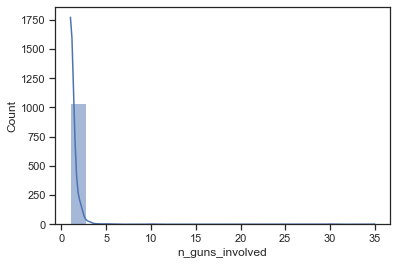

In [65]:
sns.histplot(df['n_guns_involved'], bins = 20, kde = True)

# 6. Questions

How old is the average age of a victim of Gun violence?
Age has not been discovered with our data

Which gender is affected by gun violence the most?
Gender is not yet been discovered with our data.

About how much gun violence is done with a stolen gun?
We cant see how much violence is done with a stolen gun but we did find out that the number of gun involved with each gun violence case is about 1 to 2 guns. 

What city has the most gun violence?
We cant yet see the cities that have the most gin violence but we can see the most violent congressional districts with gun violence which they all have a negative correlation but injury victims and victims who have been killed. 


# Hypothesis


If there are more guns involved then there will be more people killed

Your area based on your congressional district will have a higher death rate and injury rate due to gin violence based on where you live